In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import time
import random

#### Definiciones de Perceptron y capa

In [2]:
EPOCAS = 10

def sigmoid(x):
    """
        Funcion logistica (Sigmoid).
    """
    return 1.0/(1.0+np.exp(-x))

def sigmoid_prime(x):
    """
        Funcion logistica (Sigmoid).
    """
    return sigmoid(x)*(1-sigmoid(x))

In [3]:
class Perceptron:

    def __init__(self, n_entradas, eta=0.1, bias=None, alpha=0.1):
        self.pesos_sinapticos = np.random.uniform(
            low=-0.05, high=0.05, size=(n_entradas,))
        self.n_entradas = n_entradas
        self.bias = bias if bias else random.random()
        # Tasa de aprendizaje
        self.eta = eta
        # Constante de momentum
        self.alpha = alpha
        self.delta_anterior = 0
        self.gradiente_local = 0

    def calcular(self, estimulo):
        # Realizar operaciones vectoriales de numpy
        y = np.dot(self.pesos_sinapticos, estimulo)
        y += self.bias
        self.v = y
        self.y = sigmoid(y)
        return self.y

    def entrenar(self, estimulo):
        # eta siendo la tasa de aprendizaje
        self.calcular(estimulo)
        
#         print(type(estimulo), estimulo)
        delta = self.alpha * self.delta_anterior \
            * self.eta * self.gradiente_local * estimulo

        # Guardamos el nuevo delta
        self.delta_anterior = delta

        self.pesos_sinapticos += delta
        return self.pesos_sinapticos

In [4]:
class RedNeuronal:

    def __init__(self, n_entrada, n_oculta, n_salida, eta=0.1, alpha=0.1):

        self.n_entrada = n_entrada
        self.n_oculta = n_oculta
        self.n_salida = n_salida

        self.capa_oculta = []
        self.capa_salida = []
        self.bias = []
        self.ys = []

        self.eta = eta
        self.alpha = alpha

        self.err = []

        # Inicializar las capas
        for _ in range(self.n_oculta):
            p = Perceptron(self.n_entrada, eta=eta, alpha=alpha)
            self.capa_oculta.append(p)

        for _ in range(self.n_salida):
            p = Perceptron(self.n_oculta, eta=eta, alpha=alpha)
            self.capa_salida.append(p)
        

    def evaluar(self, entrada):

        x = entrada
        y_oculta = []
        y_salida = []

        for perceptron in self.capa_oculta:
            y = perceptron.calcular(x)
            y_oculta.append(y)

        for perceptron in self.capa_salida:
            y = perceptron.calcular(y_oculta)
            y_salida.append(y)
            
        return y_salida


    def entrenar(self, datos, resultados):
        error_avg = 0
        N = 0
        for estimulo, resultado in zip(datos, resultados):
        #Feedforward
            
            # Evaluamos el estimulo
            self.evaluar(estimulo)

            # Contruimos el arreglo de resultados
            # esperados segun la respuesta correcta
            esperados = np.array([0.1 for i in range(self.n_salida)])
            esperados[int(resultado)] = 0.9


        # BackPropagation
            
            # Capa de salida
            for neurona, d  in zip(self.capa_salida, esperados):
                error = d - neurona.y
                error_avg += (error ** 2)
                
                # Calculo del gradiente local de la capa de salida
                neurona.gradiente_local = error * sigmoid_prime(neurona.v)
                
                # Actualizacion de pesos de la nuerona
                for i in range(len(neurona.pesos_sinapticos)):
                    
                    delta = self.eta * neurona.gradiente_local * self.capa_oculta[i].y
                    momentum = self.alpha * neurona.delta_anterior
                    
                    # Calculo de delta con momentum
                    nuevo_delta = momentum + delta
                    # Actualizacion del peso
                    neurona.pesos_sinapticos[i] += nuevo_delta
                    #Guardar la variacion del peso
                    neurona.delta_anterior = nuevo_delta
                    
            # Capa ocutla
            for j, neurona in enumerate(self.capa_oculta):
                # Calculamos sigma = Sum de gradientes locales * peso_sinaptico
                # correspodiente de cada neurona
                sigma = 0
                for k in self.capa_salida:
                    sigma += k.gradiente_local * k.pesos_sinapticos[j]
                neurona.gradiente_local = sigmoid_prime(neurona.v) * sigma

                for i in range(len(neurona.pesos_sinapticos)):
                    delta = self.eta * neurona.gradiente_local * estimulo[i]
                    momentum = self.alpha * neurona.delta_anterior
                    
                    # Calculo de delta con momentum
                    nuevo_delta = momentum + delta
                    # Actualizacion del peso
                    neurona.pesos_sinapticos[i] += nuevo_delta
                    #Guardar variacion del peso
                    neurona.delta_anterior = nuevo_delta


            N += 1

        error_avg = error_avg /(2 * N)
        print("Error medio", error_avg)
        return error_avg

In [5]:
error_medio = []

def entrenar(red,train_data, train_exp, epocas=1, ):
    """
    Entrenar la red
    """
    error_medio = []
    start = time.time()
    print("Empezando el entrenamiento...")
    for epoca in range(epocas):
        print(f"Epoca {epoca}")
        err = red.entrenar(train_data, train_exp)
        error_medio.append(err)
        print(f"Tiempo: {time.time() - start}seg\n")

In [6]:
def verificar(red):
    
    print("Verificando entrenamiento...")
    count = 0
    buenos = 0
    malos = 0
    for t, r in zip(test, expected_test):
        y_salida = red.evaluar(t)
        
        # Verificar resultados
        prueba = False
        if y_salida[int(r)] >= 0.9:
            prueba = True
        for i, y in enumerate(y_salida):
            if i != r and y >= 0.9:
                prueba = False
        
        if prueba:
            buenos +=1
        else:
            malos+=1
        count +=1
    
    print(f"Datos Leidos: {count}")
    print(f"Datos buenos {buenos}, {buenos/count}")
    print(f"Datos malos {malos}, {malos/count}")

In [7]:
# Cargar los datos de entrenamiento
train = []
expected_train = []
test = []
expected_test = []
with open('../mnist_train.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
    
    for row in csv_reader:
        train.append(np.array(row[1:]) / 255)
        expected_train.append(row[0])
        
        
with open('../mnist_test.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
    
    for row in csv_reader:
        test.append(np.array(row[1:]) / 255)
        expected_test.append(row[0])
        

Verificamos la proporcion de entrenamientos en el primer cuarto que los datos
y el segundo y tercer cuarto juntos.

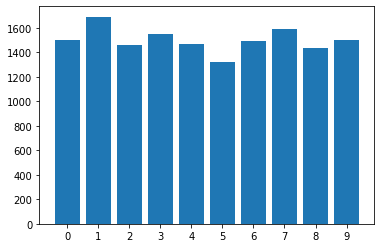

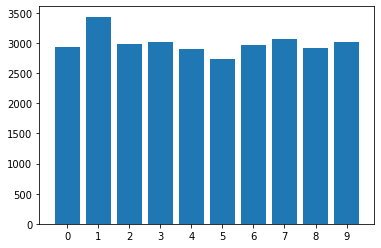

In [8]:
a = {}
names = [str(i) for i in range(10)]
for i in range(10):
    a[i] = 0

for i in expected_train[:15000]:
    a[int(i)] += 1

plt.bar (names, a.values())
plt.show()

a = {}

for i in range(10):
    a[i] = 0

for i in expected_train[15000:45000]:
    a[int(i)] += 1


plt.bar(names, a.values())
plt.show()

Empezando el entrenamiento...
Epoca 0
Error medio 0.5268149605633841
Tiempo: 2461.7572948932648seg

Epoca 1
Error medio 0.45671970444243615
Tiempo: 4890.474234819412seg

Epoca 2
Error medio 0.4067879713710133
Tiempo: 7217.577487230301seg

Epoca 3
Error medio 0.38915243810977085
Tiempo: 9397.234944105148seg

Epoca 4
Error medio 0.35552809507558986
Tiempo: 11542.238763570786seg

Epoca 5
Error medio 0.3492133216037379
Tiempo: 14120.729318380356seg

Epoca 6
Error medio 0.3525908306755968
Tiempo: 16263.514167308807seg

Epoca 7
Error medio 0.351159177986842
Tiempo: 18407.699812412262seg

Epoca 8
Error medio 0.3465574321182102
Tiempo: 20561.370565891266seg

Epoca 9
Error medio 0.32631067812172043
Tiempo: 22704.454441785812seg

Verificando entrenamiento...
Datos Leidos: 10000
Datos buenos 2552, 0.2552
Datos malos 7448, 0.7448


ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

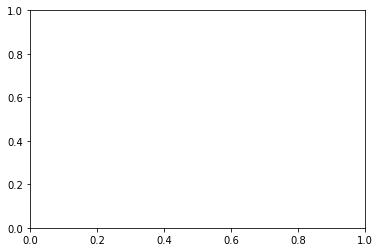

In [9]:
r1 = RedNeuronal(784,100,10,alpha=0.9)
entrenar(r1, train[:15000], expected_train[:15000],EPOCAS)
verificar(r1)

plt.plot([i for i in range(EPOCAS)], error_medio, 'r-')
plt.xlabel("Epocas")
plt.ylabel("Error medio")
plt.show()

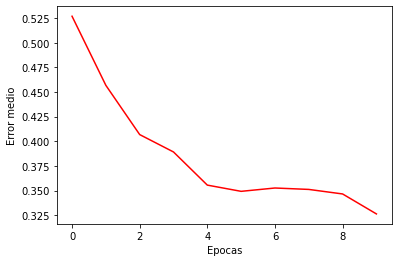

In [10]:
errores = [0.5268149605633841, 0.45671970444243615, 0.4067879713710133, 0.38915243810977085, 
           0.35552809507558986, 0.3492133216037379, 0.3525908306755968, 0.351159177986842, 
           0.3465574321182102, 0.32631067812172043]
plt.plot([i for i in range(EPOCAS)], errores, 'r-')
plt.xlabel("Epocas")
plt.ylabel("Error medio")
plt.show()

In [11]:
r2 = RedNeuronal(784,100,10,alpha=0.9)
entrenar(r2, train[15000:45000], expected_train[1500:45000],EPOCAS)
verificar(r2)

plt.plot([i for i in range(EPOCAS)], error_medio, 'r-')
plt.xlabel("Epocas")
plt.ylabel("Error medio")
plt.show()

Empezando el entrenamiento...
Epoca 0
Error medio 0.5000031334315771
Tiempo: 4480.148468255997seg

Epoca 1
Error medio 0.4963330871205224
Tiempo: 8931.919920921326seg

Epoca 2


KeyboardInterrupt: 